# Maximize Data Origin Quality 

#### Import a necessary library  

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv("amazon.csv")
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Processing

#### Drop Unnecessary Columns

In [2]:
df.drop(['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25','Unnamed: 26','Unnamed: 27'], inplace=True, axis=1)
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


#### Check for missing or inconsistent data and clean the dataset

In [3]:
print(df.isnull().sum())

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                6
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


#### Convert categorical data to numerical data using label encoding

In [4]:
le = LabelEncoder()

for col in df.columns:
    df[col] = le.fit_transform(df[col])


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   product_id           1465 non-null   int64
 1   product_name         1465 non-null   int64
 2   category             1465 non-null   int64
 3   discounted_price     1465 non-null   int64
 4   actual_price         1465 non-null   int64
 5   discount_percentage  1465 non-null   int64
 6   rating               1465 non-null   int64
 7   rating_count         1465 non-null   int64
 8   about_product        1465 non-null   int64
 9   user_id              1465 non-null   int64
 10  user_name            1465 non-null   int64
 11  review_id            1465 non-null   int64
 12  review_title         1465 non-null   int64
 13  review_content       1465 non-null   int64
 14  img_link             1465 non-null   int64
 15  product_link         1465 non-null   int64
dtypes: int64(16)
memory usag

In [6]:
df.shape

(1465, 16)

In [7]:
df.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000
mean,678.739932,671.842321,95.152218,269.074403,233.311263,43.305119,15.976109,569.583618,645.435495,600.083276,605.147440,589.129010,596.920137,596.561092,702.556314,731.012287
std,386.735334,389.327207,60.595638,161.969852,144.579058,22.466530,2.882508,331.018811,375.988050,345.488650,347.667794,341.117679,348.137929,351.363914,406.950578,423.032372
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,346.000000,336.000000,31.000000,127.000000,94.000000,26.000000,15.000000,289.000000,320.000000,301.000000,302.000000,293.000000,295.000000,295.000000,351.000000,365.000000
50%,681.000000,672.000000,97.000000,272.000000,242.000000,45.000000,16.000000,562.000000,643.000000,607.000000,614.000000,587.000000,598.000000,590.000000,696.000000,731.000000
75%,1011.000000,1010.000000,141.000000,404.000000,364.000000,60.000000,18.000000,855.000000,974.000000,902.000000,907.000000,878.000000,899.000000,907.000000,1056.000000,1097.000000
max,1350.000000,1336.000000,210.000000,549.000000,448.000000,91.000000,25.000000,1143.000000,1290.000000,1190.000000,1192.000000,1193.000000,1191.000000,1209.000000,1410.000000,1463.000000


## Data Profilling

#### It can help us understanding the quality and characteristics for this Dataset  

In [8]:
# Calculate some basic statistics on the numerical columns
numerical_cols = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']
print(df[numerical_cols].describe())


       discounted_price  actual_price  discount_percentage       rating  \
count       1465.000000   1465.000000          1465.000000  1465.000000   
mean         269.074403    233.311263            43.305119    15.976109   
std          161.969852    144.579058            22.466530     2.882508   
min            0.000000      0.000000             0.000000     0.000000   
25%          127.000000     94.000000            26.000000    15.000000   
50%          272.000000    242.000000            45.000000    16.000000   
75%          404.000000    364.000000            60.000000    18.000000   
max          549.000000    448.000000            91.000000    25.000000   

       rating_count  
count   1465.000000  
mean     569.583618  
std      331.018811  
min        0.000000  
25%      289.000000  
50%      562.000000  
75%      855.000000  
max     1143.000000  


#### Count the number of unique values in each column

In [9]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

df.head()

product_id: 1351 unique values
product_name: 1337 unique values
category: 211 unique values
discounted_price: 550 unique values
actual_price: 449 unique values
discount_percentage: 92 unique values
rating: 26 unique values
rating_count: 1144 unique values
about_product: 1291 unique values
user_id: 1191 unique values
user_name: 1193 unique values
review_id: 1194 unique values
review_title: 1192 unique values
review_content: 1210 unique values
img_link: 1411 unique values
product_link: 1464 unique values


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,346,1158,10,350,6,60,17,454,472,628,533,818,879,600,1123,1306
1,848,134,10,163,258,37,15,761,277,107,227,1024,11,418,1249,179
2,819,1023,10,163,65,89,14,1034,1248,846,494,828,418,672,886,1164
3,643,1264,10,315,379,48,17,1118,1008,269,625,787,374,274,531,401
4,588,829,10,133,270,57,17,281,1187,38,1139,132,49,123,1212,928


#### Create a histogram of discounted_price and  a box plot of rating


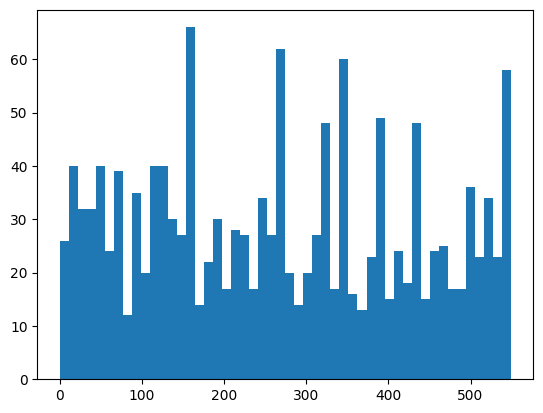

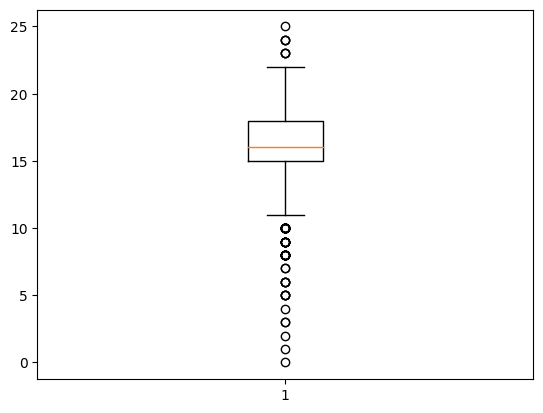

In [10]:
import matplotlib.pyplot as plt

plt.hist(df['discounted_price'], bins=50)
plt.show()

plt.boxplot(df['rating'])
plt.show()


## Understanding the distribution of discounted prices across different product categories

#### Calculate the correlation between discounted_price and rating.
#### Then Group the data by category and calculate the mean discounted_price for each category.

In [11]:
print(df['discounted_price'].corr(df['rating']))


category_mean = df.groupby('category')['discounted_price'].mean()
print(category_mean)


0.06584322470907038
category
0      184.000000
1      198.500000
2      455.000000
3      350.500000
4      484.500000
          ...    
206    325.500000
207    449.500000
208    268.000000
209    231.333333
210    132.000000
Name: discounted_price, Length: 211, dtype: float64


## Data Validation 

#### Now we want to know the validition of qulity for this data that we were worked with therefore we have a small Dataset (1465, 16) so we will use a deep Learning Model using SKlearn & Tensorflow 

In [12]:
#Import a necessary library
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense

2023-05-11 13:58:47.805854: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-11 13:58:47.846407: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-11 13:58:47.847060: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-11 13:58:48.572562: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [13]:
# Split the data into features and target variable

X = df.drop("actual_price", axis=1)
y = df["actual_price"]

In [14]:
# Encode categorical variables
X = pd.get_dummies(X, columns=["product_id", "category", "user_id"])

In [15]:
# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [16]:
# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [17]:
# Build the model
model = Sequential()
model.add(Dense(64, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation="relu"))
model.add(Dense(1))

In [18]:
# Compile the model
model.compile(loss="mean_squared_error", optimizer="adam")

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=64)


Epoch 1/100
15/15 [==============================] - 1s 12ms/step - loss: 77570.2344 - val_loss: 74286.1484
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 75707.6875 - val_loss: 71627.4531
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 72723.7812 - val_loss: 66628.8516
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 67575.1406 - val_loss: 58456.3359
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 59342.4297 - val_loss: 46878.1367
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 48087.1406 - val_loss: 33187.4336
Epoch 7/100
15/15 [==============================] - 0s 5ms/step - loss: 34061.8672 - val_loss: 21645.2168
Epoch 8/100
15/15 [==============================] - 0s 4ms/step - loss: 20242.9258 - val_loss: 18115.8770
Epoch 9/100
15/15 [==============================] - 0s 4ms/step - loss: 9841.5684 - val_loss: 25783.8867
Epoch 10/100
15/15 [=================

15/15 [==============================] - 0s 4ms/step - loss: 0.3023 - val_loss: 49157.9922
Epoch 80/100
15/15 [==============================] - 0s 4ms/step - loss: 0.1621 - val_loss: 49146.4844
Epoch 81/100
15/15 [==============================] - 0s 4ms/step - loss: 0.3693 - val_loss: 49144.5898
Epoch 82/100
15/15 [==============================] - 0s 4ms/step - loss: 0.2576 - val_loss: 49151.9375
Epoch 83/100
15/15 [==============================] - 0s 4ms/step - loss: 0.2672 - val_loss: 49149.7969
Epoch 84/100
15/15 [==============================] - 0s 4ms/step - loss: 0.5585 - val_loss: 49142.9922
Epoch 85/100
15/15 [==============================] - 0s 4ms/step - loss: 0.4804 - val_loss: 49153.9648
Epoch 86/100
15/15 [==============================] - 0s 4ms/step - loss: 0.6362 - val_loss: 49151.3984
Epoch 87/100
15/15 [==============================] - 0s 4ms/step - loss: 1.4300 - val_loss: 49135.4023
Epoch 88/100
15/15 [==============================] - 0s 4ms/step - loss: 1.2

In [19]:
# Evaluate the model on the test set
mse = model.evaluate(X_test, y_test)
print("Mean squared error on test set:", mse)


10/10 [==============================] - 0s 1ms/step - loss: 62639.4961
Mean squared error on test set: 62639.49609375


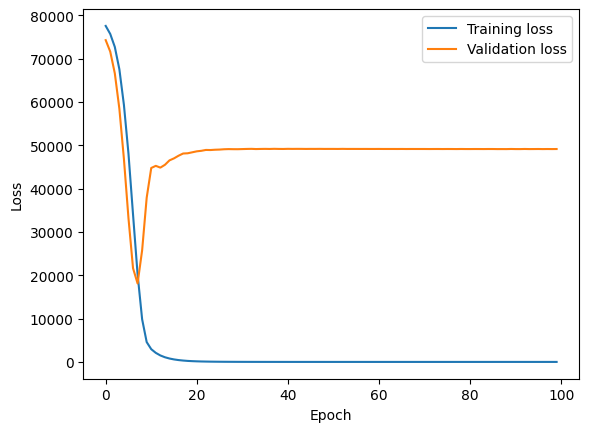

In [21]:
# Plot the training and validation loss curves
import matplotlib.pyplot as plt
plt.plot(history.history["loss"], label="Training loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

#### Mean squared error on test set: 62639.49609375
#### this lead us that this data has a very bad validition